<a href="https://colab.research.google.com/github/Rothy-0x/posttest2-datamining/blob/main/2109116090_Albygael%20Rifal%20Nifansa_Post%20Test%202%20%7C%20DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd


# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [51]:
# df untuk membaca file excel dataset.xlsx dengan method read_excel dengan nama sheet DatasetBaru - Sheet1
df = pd.read_csv("https://raw.githubusercontent.com/Rothy-0x/posttest2-datamining/main/posttest2-1_.csv")
# melihat data tabular item pada variabel df
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# untuk menghitung jumlah nilai pada setiap kolom
df.sum() 

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [53]:
# untuk mengetahui kolom apa saja yang ada di dalam dataset
df.columns 

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread', 'yogurt', 'soda', 'pickled vegetables', 'canned beer', 'misc. beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'butter milk', 'specialty chocolate',
       'frozen meals', 'dental care', 'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [54]:
# import library untuk membuat kombinasi barang
from itertools import permutations 
# untuk menyimpan seluruh kemungkinan kombinasi barang
rules = list(permutations(df.columns, 2))
# untuk menampilkan keseluruhan hasil kombinasi
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [55]:
# Menghitung kemunculan kombinasi yang ada pada dataset
rule_new = [] # Menyimpan data dalam bentuk list
for rule in rules: # pengulangan pembacaan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) > 0: # menentukan apakah kombinasi tersebut ada atau tidak
    rule_new.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple dalam list
rule_new #menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [56]:
hitung = {} # Menyimpan data dalam bentuk dictionary
for rule in rule_new:  # Mengulangi pembacaan dataset
  banyak_data= len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hitung # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [57]:
# untuk melihat banyak transaksi
len(df)

19

In [58]:
# List support
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%") # Menghitung support pada tiap tiap kombinasi item dan menampilkannya

('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles'

In [59]:
# List Confidens
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
#"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

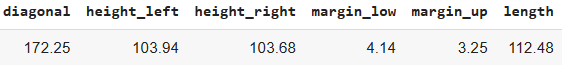
<!-- 1412 -->

In [60]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Rothy-0x/posttest2-datamining/main/deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [61]:
# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
distances = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - new_data['diagonal']) ** 2 +
                       (row['height_left'] - new_data['height_left']) ** 2 +
                       (row['height_right'] - new_data['height_right']) ** 2 +
                       (row['margin_low'] - new_data['margin_low']) ** 2 +
                       (row['margin_up'] - new_data['margin_up']) ** 2 +
                       (row['length'] - new_data['length']) ** 2)
    distances.append(distance)

# Menambahkan kolom distance ke dataframe utama
df2['distance'] = distances

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


### 1.1 Menambahkan kolom jarak

In [62]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0 0.671267 dtype: float64
1,True,171.66,103.68,103.41,4.35,3.33,113.74,0 1.458321 dtype: float64
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0 0.834626 dtype: float64
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0 0.910934 dtype: float64
4,True,171.79,104.57,104.04,4.26,3.15,113.46,0 1.312593 dtype: float64
5,False,172.00,104.23,104.52,5.76,3.37,110.94,0 2.421281 dtype: float64
6,False,171.56,104.03,103.93,5.47,3.50,111.67,0 1.741896 dtype: float64
7,False,171.90,104.33,104.40,4.70,3.31,112.12,0 1.113463 dtype: float64
8,False,171.84,104.06,104.10,4.87,3.25,111.04,0 1.722034 dtype: float64
9,False,172.11,104.14,104.15,4.84,3.28,110.98,0 1.738217 dtype: float64


### 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [63]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [64]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 
Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Albygael Rifal Nifansa

> Nim : 2109116090


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Analisis

### Business Understanding 
 

  * Goals perusahaan asuransi kesahatan dari dataset yang dapat diidentifikasi adalah 
 

1.   Mempelajari perilaku pelanggan: Perusahaan asuransi kesehatan dapat menganalisis data tersebut untuk memahami perilaku pelanggan, seperti faktor-faktor apa yang paling mempengaruhi keputusan pembelian asuransi kesehatan. Hal ini dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih efektif.

2. Menentukan harga premi yang sesuai: Dengan menganalisis data seperti usia, BMI, merokok atau tidak, dan jumlah anak yang dimiliki pelanggan, perusahaan dapat menentukan harga premi yang lebih akurat dan sesuai dengan risiko yang dihadapi oleh pelanggan.
 
3. Meningkatkan kepuasan pelanggan: Dengan memahami faktor-faktor yang mempengaruhi biaya asuransi kesehatan dan keputusan pembelian asuransi, perusahaan dapat merancang program asuransi yang lebih tepat sasaran untuk pelanggan mereka. Hal ini dapat meningkatkan kepuasan pelanggan dan memperkuat loyalitas pelanggan.

4. Meningkatkan efisiensi bisnis: Dengan menggunakan analisis data, perusahaan dapat mengidentifikasi pola-pola dalam klaim asuransi dan memprediksi risiko klaim yang lebih tinggi. Hal ini dapat membantu perusahaan untuk merancang program asuransi yang lebih baik dan meningkatkan efisiensi bisnis mereka.

5. Menjaga keuntungan: Dengan memahami risiko dan perilaku pelanggan, perusahaan dapat merancang program asuransi yang lebih efektif dan meminimalkan risiko klaim yang tinggi. Hal ini dapat membantu perusahaan untuk menjaga keuntungan dan mengurangi risiko kebangkrutan.

* Tujuan pengguanaan DM :
1. Prediksi biaya asuransi kesehatan: Dengan menggunakan algoritma Data Mining, perusahaan dapat memprediksi biaya asuransi kesehatan di masa depan untuk setiap pelanggan berdasarkan informasi yang ada pada data. Informasi seperti usia, BMI, merokok atau tidak, jumlah anak, dan wilayah tempat tinggal dapat menjadi faktor-faktor yang mempengaruhi biaya asuransi. Dengan memprediksi biaya asuransi, perusahaan dapat menetapkan harga premi yang lebih tepat sasaran dan meningkatkan efisiensi bisnis mereka.

2. Identifikasi faktor-faktor risiko: Data Mining dapat membantu perusahaan untuk mengidentifikasi faktor-faktor yang meningkatkan risiko klaim asuransi. Misalnya, perusahaan dapat mengidentifikasi pola-pola dalam klaim asuransi untuk pemegang polis yang merokok atau memiliki BMI tinggi. Hal ini dapat membantu perusahaan untuk merancang program asuransi yang lebih tepat sasaran dan mengurangi risiko klaim yang tinggi.

3. Segmentasi pelanggan: Dengan menggunakan algoritma Data Mining, perusahaan dapat membagi pelanggan menjadi kelompok-kelompok berdasarkan karakteristik dan perilaku mereka. Hal ini dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih efektif dan meningkatkan kepuasan pelanggan.

4. Pendeteksian kecurangan: Data Mining dapat membantu perusahaan untuk mendeteksi kecurangan dalam klaim asuransi kesehatan. Dengan menganalisis pola-pola anomali dalam klaim asuransi, perusahaan dapat mengidentifikasi pola kecurangan dan mengambil tindakan yang sesuai.

5. Analisis risiko: Data Mining dapat membantu perusahaan untuk melakukan analisis risiko dan memperkirakan probabilitas terjadinya kejadian tertentu. Hal ini dapat membantu perusahaan untuk merancang program asuransi yang lebih efektif dan mengurangi risiko kebangkrutan.







## Data Understanding


1.   Collecting Data
2.   Penjelasan setiap kolom
3.   Visualisasi dan artinya



### Collecting Data

In [65]:
df3 = pd.read_csv("https://raw.githubusercontent.com/Rothy-0x/posttest2-datamining/main/Churn_Modelling.csv")

### Describe Data

In [66]:
df3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Deskripsi setiap kolom 

In [67]:
df3.info()

# Dataset ini memiliki 1338 baris dan 7 kolom.
# Berikut adalah penjelasan untuk masing-masing kolom:

# RowNumber: kolom ini berisi nomor baris dalam dataset, dimulai dari 0 hingga 10000 
# CustomerId: kolom ini berisi ID unik untuk setiap pelanggan bank dalam format integer
# Surname:kolom ini berisi nama belakang pelanggan dalam format objek
# CreditScore: kolom ini berisi skor kredit pelanggan, yang mencerminkan seberapa baik atau buruk rekam jejak kredit pelanggan dalam format integer
# Geography: kolom ini berisi negara tempat pelanggan tinggal, yaitu Prancis, Jerman, atau Spanyol dalam format objek
# Gender: kolom ini berisi jenis kelamin pelanggan dalam format objek
# Age: kolom ini berisi usia pelanggan dalam format integer
# Tenure: kolom ini berisi jangka waktu dalam tahun yang pelanggan telah menjadi nasabah bank dalam format integer
# Balance: kolom ini berisi saldo rekening pelanggan dalam format float
# NumOfProducts: kolom ini berisi jumlah produk keuangan yang dimiliki oleh pelanggan dalam format integer
# HasCrCard: kolom ini berisi indikator apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak) dalam format integer
# IsActiveMember: kolom ini berisi indikator apakah pelanggan masih aktif menggunakan layanan bank (1 = Aktif, 0 = Tidak Aktif) dalam format integger
# EstimatedSalary: kolom ini berisi estimasi gaji pelanggan dalam format float
# Exited:  kolom ini berisi indikator apakah pelanggan telah keluar dari bank (1 = Ya, 0 = Tidak) dalam format integer

# Dataset ini memiliki 3 jenis tipe data yaitu int, float, dan object. Terdaoat juga 10000 nilai pada setiap kolom, menandakan tidak ada missing value pada dataset ini 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [68]:
df3.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [69]:
df3.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Visualisasi dan Penjelasan

1. Hubungan antara Age dengan Tenure(Jangka Waktu)

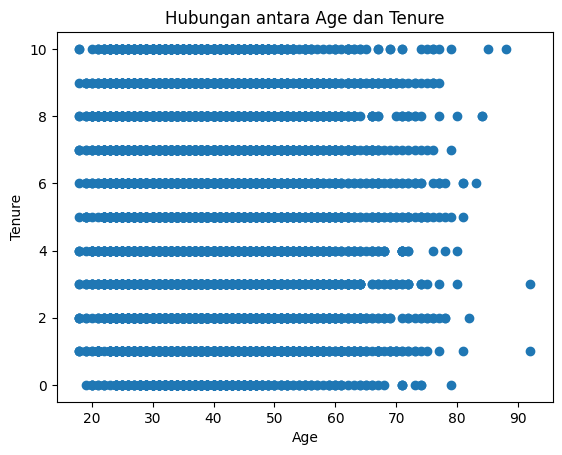

In [77]:

import matplotlib.pyplot as plt

# memilih kolom NumOfProducts  dan Balance
Age  = df3['Age']
Tenure = df3['Tenure']

# membuat scatter plot
plt.scatter(Age , Tenure)
plt.title("Hubungan antara Age dan Tenure")
plt.xlabel("Age")
plt.ylabel("Tenure")
plt.show()
# Scatter plot diatas menunjukkan hubungan antara NumOfProducts dengan Balance.
# Setiap titik pada scatter plot menunjukkan NumOfProducts dan Balance pelanggan. 
# Semakin banyak produk keuangan yang dimiliki oleh pelanggan, semakin besar kemungkinan bahwa mereka memiliki saldo yang lebih besar dalam rekening mereka. 


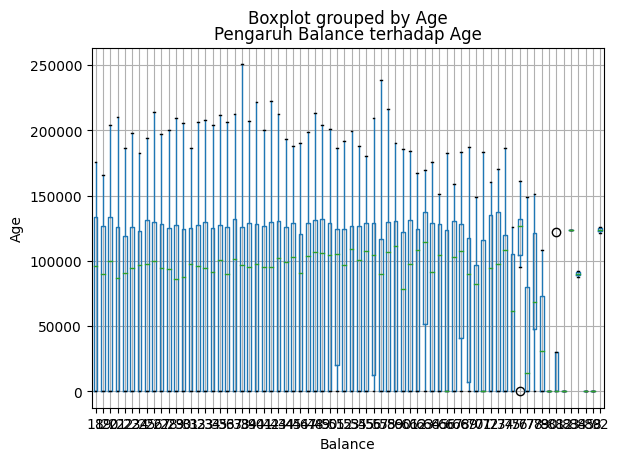

In [78]:
# Box plot yang dibuat menunjukkan pengaruh  kolom Age terhadap kolom Balance 

# memilih kolom Balance dan Age
Age = df3['Age']
Balance = df3['Balance']

# membuat box plot
df3.boxplot(column='Balance', by='Age')
plt.title("Pengaruh Balance terhadap Age")
plt.xlabel("Balance")
plt.ylabel("Age")
plt.show()



### Data preparation 

In [71]:
df3.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Cleaning Data

In [72]:
# menghapus kolom RowNumber
df3.drop(columns=['RowNumber'], axis=1, inplace=True)

# menghapus kolom CustomerId
df3.drop(columns=['CustomerId'], axis=1, inplace=True)


# Kedua kolom tersebut dihapus karena datanya terlalu random 

In [73]:
df3

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
